### Setup

In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath(".."))
from src.data_processing import load_processed_data
from src.visualization import plot_rating_distribution, plot_long_tail

### Load data

In [2]:
PROCESSED_FOLDER = "../data/processed"
data, user_map, product_map = load_processed_data(PROCESSED_FOLDER)

### Check data

In [3]:
print(f"Data Loaded: Shape: {data.shape}")

Data Loaded: Shape: (2023070, 4)


In [4]:
print(f"Users: {len(user_map)}")
print(f"Products: {len(product_map)}")

Users: 1210271
Products: 249274


### Compute Data Sparsity

In [5]:
n_users = len(user_map)
n_products = len(product_map)
n_ratings = data.shape[0]

total_possible_ratings = n_users * n_products
sparsity = 1 - (n_ratings / total_possible_ratings)

print(f"Matrix Sparsity: {sparsity:.8f}")

Matrix Sparsity: 0.99999329


### Khám phá dữ liệu

#### Kiểm tra tổng quan về dữ liệu

In [6]:
print(f"Data sample:\n{data[:5]}")

Data sample:
[[0.0000000e+00 0.0000000e+00 5.0000000e+00 1.3696992e+09]
 [1.0000000e+00 1.0000000e+00 3.0000000e+00 1.3554432e+09]
 [2.0000000e+00 1.0000000e+00 5.0000000e+00 1.4046912e+09]
 [3.0000000e+00 2.0000000e+00 4.0000000e+00 1.3825728e+09]
 [4.0000000e+00 3.0000000e+00 1.0000000e+00 1.2742272e+09]]


In [7]:
print(f"Data size: {data.size}")

Data size: 8092280


In [8]:
print(f"Data shape: {data.shape}")

Data shape: (2023070, 4)


In [9]:
print(f"Data type: {data.dtype}")

Data type: float32


#### Khám phá cột **rating** (index = 2)

In [10]:
ratings = data[:, 2]
print(f"Ratings sample:\n{ratings[:5]}")

Ratings sample:
[5. 3. 5. 4. 1.]


In [11]:
print(f"len(ratings): {len(ratings)}")

len(ratings): 2023070


In [12]:
print(f"Check missing values in ratings: {np.isnan(ratings).any()}")

Check missing values in ratings: False


#### Thống kê mô tả cho cột rating

In [13]:
min_rating, max_rating = np.min(ratings), np.max(ratings)
mean_rating, median_rating = np.mean(ratings), np.median(ratings)
std_rating = np.std(ratings)
percentiles = np.percentile(ratings, [25, 50, 75])
print(f"Rating Statistics:")
print(f"Min: {min_rating}")
print(f"Max: {max_rating}")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating}")
print(f"Std Dev: {std_rating:.2f}")
print(f"25th Percentile: {percentiles[0]}")
print(f"50th Percentile: {percentiles[1]}")
print(f"75th Percentile: {percentiles[2]}")

Rating Statistics:
Min: 1.0
Max: 5.0
Mean: 4.15
Median: 5.0
Std Dev: 1.31
25th Percentile: 4.0
50th Percentile: 5.0
75th Percentile: 5.0


#### Ý nghĩa
1. Min
    - Giá trị `min = 1`, nghĩa là dataset có chứa phản hồi tiêu cực, chứng tỏ dải dữ liệu không bị thiếu.
2. Max
    - Giá trị `max = 5`, nghĩa là dataset có chứa phản hồi tích cực, chứng tỏ dải dữ liệu không bị thiếu.
3. Mean
    - Giá trị `mean = 4.15`. Điều này tương đối bất thường trong thực tế, chứng tỏ hầu hết các sản phẩm đều được đánh giá là **positive**.
    - Recommender Systems cần lưu ý vì ít đánh giá **negative**, mô hình dễ bị bias.
4. Median
    - Giá trị `median = 5` chứng tỏ phân phối bị lệnh phải, chủ yếu là rating cao. Điều này cho thấy rằng đa số người dùng hài lòng hoặc họ không đánh giá khi không hài lòng.
    - Việc median cao hơn mean $\to$ chứng tỏ phân phối nghiêng về đánh giá cao.
5. Std dev
    - Giá trị `std = 1.31`, giá trị này không quá cao chứng tỏ dữ liệu không quá đa dạng, phần lớn người dùng đánh giá 4-5 sao.
6. 25th percentile
    - Giá trị `25th Percentile = 4.0`, có nghĩa là có 25% số rating <= 4. Tức là rating 1-3 rất ít.
7. 50th percentile
    - Tương tự như `median`. Khi median = max, phân phối càng lệch về phía cao (right-skew).
8. 75th percentile
   - Giá trị `75th Percentile = 5.0`, có nghĩa là có 75% người dùng đều cho rating 5 sao.

#### Một số lưu ý được rút ra từ kết quả thống kê trên
- Dữ liệu thiếu tính phân biệt: Nếu hầu hết đều chấm 4–5 thì mô hình khó học sự khác biệt sở thích thực sự.
- Nên kiểm tra Long Tail: Xem sản phẩm nào được rating rất ít $\to$ Cold start.
- Cần đảm bảo K-core filtering: Để loại người dùng / sản phẩm quá ít rating.

#### Phân phối điểm đánh giá


d:\Coding\Programming_DS\HW02\RecommendationSystem\src\visualization.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=counts, palette="viridis")


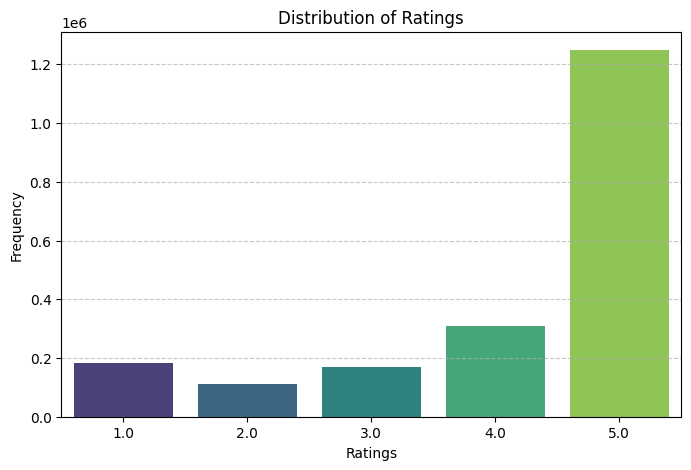

In [7]:
plot_rating_distribution(data)

Biểu đồ này trực quan hóa tần suất xuất hiện của các mức điểm từ 1.0 đến 5.0. Mục tiêu là để kiểm tra mức độ cân bằng của dữ liệu (Data Balance).
- Ý nghĩa: Trong thương mại điện tử, người dùng có xu hướng chỉ đánh giá khi họ thực sự hài lòng (Positive bias). Chắc hẳn đây là tâm lý chung của nhiều người, khi sản phẩm khiến họ cảm thấy hài lòng, tâm trạng vui vẻ sẽ thúc đẩy người dùng đánh giá tốt cho sản phẩm. Ngoài ra, một chiến lược được áp dụng rộng rãi ngày nay là khi gửi sản phẩm đến tay người dùng, doanh nghiệp sẽ gửi một tờ phiếu nhỏ kèm theo với lời nhắn thường có nội dung "Nếu cảm thấy không hài lòng về sản, đừng vội đánh giá 1 sao, hãy liên hệ lại với cửa hàng để được hỗ trợ", chính vì điều này thường khiến cho hầu hết các sản phẩm trên các sàn thương mại điện tử đều được đánh giá cao. Với sự mất cân bằng về dữ liệu như vậy, mô hình học máy sẽ gặp khó khăn trong việc phân biệt giữa sản phẩm "thực sự xuất sắc" và sản phẩm "bình thường nhưng được chấm nương tay".

#### Phân phối đuôi dài (Long tail)
Trong hầu hết các hệ thống E-commerce, dữ liệu tuân theo **nguyên lý Pareto** (Quy tắc 80/20) hoặc định luật lũy thừa (Power Law). Biểu đồ sẽ có dạng chữ "L" đặc trưng với hai phần rõ rệt:
<img src="https://media.nngroup.com/media/editor/2021/11/29/the-long-tail.jpg" alt="Rating Distribution" width="400">
- **Phần đầu (The head):** Một số lượng rất nhỏ các sản phẩm "Hot" (Best-sellers) hoặc người dùng "Power Users" chiếm phần lớn tổng số lượng tương tác. Đây là vùng dữ liệu dày đặc, nơi các thuật toán lọc cộng tác (Collaborative Filtering) hoạt động rất tốt.
- **Phần đuôi (The tail):** Phần còn lại trải dài vô tận về phía bên phải. Đây là hàng trăm nghìn sản phẩm chỉ được mua 1-2 lần, hoặc những người dùng chỉ ghé thăm một lần rồi đi. Mặc dù mỗi cá thể ở phần đuôi có lượng tương tác thấp, nhưng tổng hợp lại, chúng chiếm một khối lượng sản phẩm khổng lồ (Niche market).


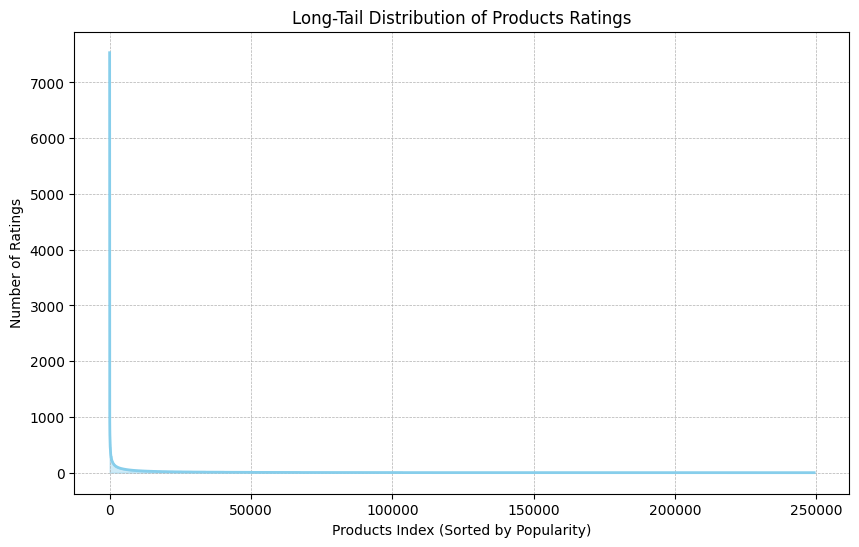

In [8]:
plot_long_tail(data, column_index=1, entity_name="Products")

##### Phân phối Long-tail của **Products**
- Ý nghĩa các trục:
  - Trục x: Products index (sắp xếp theo độ phổ biển giảm dần)
  - Trục y: Số lượng rating
- Biểu đồ thể hiện phân phối Long-tail:
  - **Phần đầu:** Một số rất ít sản phẩm (bên trái biểu đồ) nhận rất nhiều đánh giá (~7000 ratings cho sản phẩm phổ biến nhất). Đây là các sản phẩm cực kỳ hot, được người dùng review nhiều.
  - **Phần đuôi:** Phần lớn sản phẩm (bên phải biểu đồ) có rất ít rating, nhiều sản phẩm chỉ có vài hoặc thậm chí 1 rating. Đuôi dài $\to$ phân phối long-tail, phổ biến trong các dataset e-commerce như Amazon.

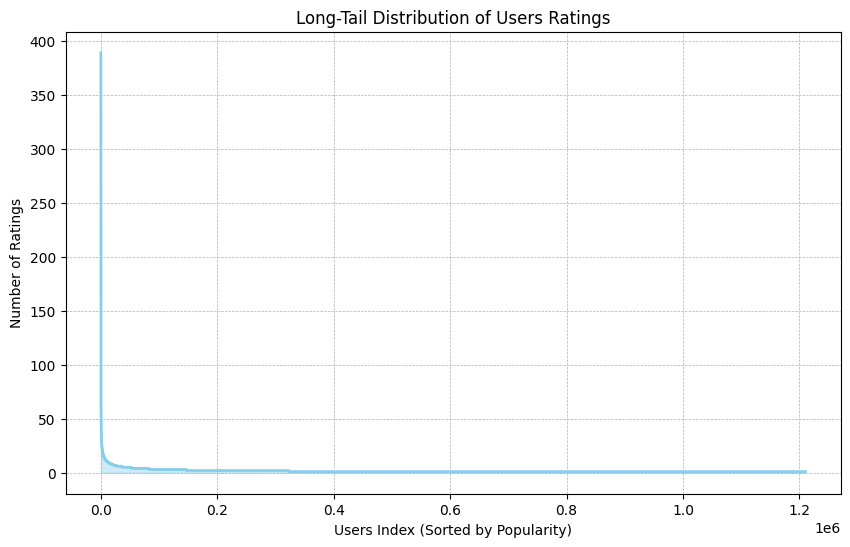

In [9]:
plot_long_tail(data, column_index=0, entity_name="Users")

##### Phân phối Long-tail của **Users**
- Ý nghĩa các trục:
  - Trục x: Users index (sắp xếp theo độ phổ biến giảm dần)
  - Trục y: Số lượng rating
- Biểu đồ thể hiện phân phối Long-tail: 
  - **Phần đầu:** Ở phía bên trái biểu đồ, có một số rất ít người dùng nhận được số lượng đánh giá cực lớn (gần 400 rating). Đây là nhóm người dùng phổ biến hoặc rất hoạt động, chiếm tỷ lệ nhỏ nhưng tạo ra phần lớn tương tác.
  - **Phần đuôi:** Phần đuôi trải dài về phía phải, hầu hết các người dùng chỉ nhận được rất ít đánh giá (gần bằng 0–5 rating). Điều này cho thấy đa số người dùng ít hoạt động, hoặc sản phẩm mà họ đánh giá không phổ biến.

### Một số câu hỏi có ý nghĩa